## Activity session, part 1

In this part we will not use any data structures yet, only usual arrays.
Please solve problems one after another. For all of the problems you need to write the code, say what is complexity and do tests to make sure you code is working as it should.

$\textbf{Problem 1.}$ Implement binary search: you have sorted array of numbers: $a_1, \dots, a_n$ and your goal is to find the number $key$ in this array.
**Example:** you have array $1,2,7,18,35,78$ and the goal is to find number $key = 7$. 

$\textbf{Problem 2.}$ Implement bubble sort, generate different data, using random numbers generation (fix seed for reproducible results!) and make sure, that the average working time is $O(n^2)$. Make plot with dependece of complexity versus time, use regression to show the desired behaviour.

$\textbf{Problem 3.}$ Implement merge sort, get the same type of plot as in previous problem and make sure that working time is proportional to $O(n\log n)$, use regression to show the complexity.

$\textbf{Problem 4.}$ Implement quick sort, not using the additional memory, you can see the example below for better understanding. Do the same procedure as for prevuios problem and compare it with merge sort. Which one is better?

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \$
![picture](https://sites.google.com/site/listasenlazadas/_/rsrc/1403593304712/anexos/150px-Partition_example.svg.png?height=400&width=327)


$\textbf{Problem 5.}$ Suppose, that you have a sorted array $a_1, \dots, a_n$ and then for some **unknown** $k$ we put the first $k$ elements to the end. Find the given element $key$ in this new array. 

**Example:** you original sorted array is $1,2,5,8,13,28,42$, number $k=3$ and new array is $8,13,28,42,1,2,5$. Note, that it is not sorted anymore, but still it is almost sorted. Let $key = 42$, then you answer should be 3, because it is the number of element with this key.


## Problem 1

In [ ]:
# @nums: given array
# @key: element looking for
# @return : True if element in list, False is not
# @Complexity : O(log(n))
def BinarySearch(nums, key):
    #print('Doing binary search on', nums)
    if not nums: return False # if array is empty
    else:
        i = len(nums)//2 # middle index
        m = nums[i] # middle value
        if key == m: return True
        if key > m: return BinarySearch(nums[i+1:], key)
        if key < m: return BinarySearch(nums[:i], key)

In [ ]:
# Test
print(BinarySearch([1],1), BinarySearch([1],0), BinarySearch([1],2), BinarySearch([2],-1), BinarySearch([],1))
print(BinarySearch([-4,5],1), BinarySearch([2,4],1), BinarySearch([2,5],2), BinarySearch([2,5],5), BinarySearch([3,7],10))
print(BinarySearch([2,4,8],-11), BinarySearch([2,4,8],3), BinarySearch([2,4,8],2), BinarySearch([2,4,8],8), BinarySearch([2,4,8],11))
print(BinarySearch([1,2,4,4,5,6,7,8,9,10],3), BinarySearch([1,2,4,4,5,6,7,8,9,10],4), BinarySearch([1,2,4,4,5,6,7,8,9,10],10), BinarySearch([1,2,4,6,7,9,10],1))
BinarySearch(list(range(1,10**3)),724)

True False False False False
False False True True False
False False True True False
False True True True


True

In [ ]:
# @acc : Accumulator of the index of the searched element
# @return : index of searched element
# @Complexity : O(log(n))
def Search1(nums, key, acc): # Version1
    if not nums: 
        return False # if array is empty
    else:
        i = len(nums)//2 # middle index
        if key == nums[i]: return acc
        if key > nums[i]: return Search1(nums[i+1:], key, acc + 1 + len(nums[i+1:])//2)
        if key < nums[i]: return Search1(nums[:i], key, acc - (len(nums[:i])%2!=0) - len(nums[:i])//2)

def Search2(nums, key, acc): #Version2
    if not nums: 
        return False # if array is empty
    else:
        middle = len(nums)//2
        if key == nums[middle]: return acc
        if key > nums[middle]: return Search2(nums[middle+1:], key, acc + (len(nums)-middle+1)//2)
        if key < nums[middle]: return Search2(nums[:middle], key, acc - (middle+1)//2)

def BinarySearchIndex(nums, key): 
    return Search2(nums, key, len(nums)//2) # initialization of the accumulator

In [ ]:
# Test
print(BinarySearchIndex([],34), BinarySearchIndex([1],34), BinarySearchIndex([1],0), BinarySearchIndex([1],1))
print(BinarySearchIndex([1,3],0), BinarySearchIndex([1,3],1), BinarySearchIndex([1,3],3), BinarySearchIndex([1,3],2))
print(BinarySearchIndex([1,3,7],-3), BinarySearchIndex([1,3,7],2), BinarySearchIndex([1,3,7],7), BinarySearchIndex([1,3,7],3), BinarySearchIndex([1,3,7],1))
print(BinarySearchIndex([1,3,8,10,13,16,20,31],31), BinarySearchIndex([1,3,8,10,13,16,20,31],10), BinarySearchIndex([1,3,8,10,13,16,20,31],16))
l = []
for i in range(1,20):
    l.append(BinarySearchIndex(list(range(2,19)),i)) 
print(l)

False False False 0
False 0 1 False
False False 2 1 0
7 3 5
[False, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, False]


## Problem 2

In [ ]:
# Complexity : O(n^2)
def BubbleSort(nums):
    n, permut, cpt = len(nums), True, 1 # Initialization
    while permut: # array is sorted if there is no more permutation => we then go out of the loop
        permut = False
        for i in range(0,n-cpt):
            if nums[i] > nums[i+1]:
                temp = nums[i]
                nums[i] = nums[i+1]
                nums[i+1] = temp
                permut = True
        cpt+=1 # With each loop the largest element is in its place. No need to compare it in the next iteration.
    return nums

In [ ]:
# Tests
print(BubbleSort([]), BubbleSort([1]), BubbleSort([2,1]), BubbleSort([3,5,1,32,4,67,21,34,0,32,21,-3.4,3.2,4]))
print(BubbleSort(list(range(12,-5,-1))), BubbleSort([45,21,12,3,3,2,2,2,-5,-5,2,3,21,12,34,54,32]))

[] [1] [1, 2] [-3.4, 0, 1, 3, 3.2, 4, 4, 5, 21, 21, 32, 32, 34, 67]
[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [-5, -5, 2, 2, 2, 2, 3, 3, 3, 12, 12, 21, 21, 32, 34, 45, 54]


In [ ]:
# @func : sorting algorighm
# @num_it : number of iterations to average over - how many time we do our experiment - Nombre de fois qu'on va trier les tableaux 
# @N_big : upper limit of computations - limite supérieure des calculs - how many points we want <=> taille limite des tableaux à trier
# @step : step-size to plot
def Generate_Data(num_it, N_big, step, func):
    points_to_plot = np.arange(step, N_big+1, step) # creating array points_to_plot of points to plot the graph
    el_time = np.zeros(len(points_to_plot))
    for i in range(len(points_to_plot)): # We go through the dimensions of arrays
        for j in range(num_it):
            temp = Data[j,:points_to_plot[i]]   # do this, because sort is working locally and change our Data
            t0 = time.time()
            func(temp) # We sort the j-th array with dimension points_to_plot[i].
            t1 = time.time()
            el_time[i] += (t1 - t0)
        el_time[i]/= num_it
    return(points_to_plot, el_time)

## Problem 2 - complexity of algorithm
apply funtion `Generate_Data` here and showt that complexity of bubble sort is indeed $O(n^2)$.

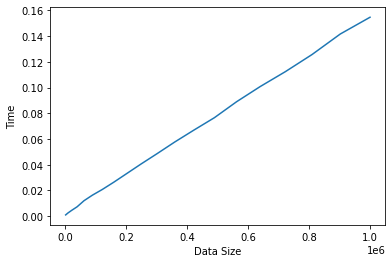

0.001714889527688064 [1.53866184e-07]


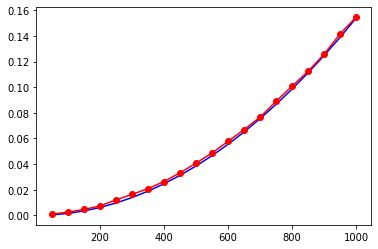

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(1)
N_big = 1000
num_it = 10
step = 50
Data = np.random.rand(num_it, N_big)

dataSize, execTime = Generate_Data(num_it, N_big, step, BubbleSort)

plt.plot(dataSize**2, execTime)
plt.ylabel("Time")
plt.xlabel("Data Size")
#plt.axis([-10, 120, 0, 0.0012])
plt.show()


regressor = LinearRegression()
result = regressor.fit((dataSize**2).reshape(-1,1), execTime)
print(result.intercept_, result.coef_)
plt.plot(dataSize, dataSize**2 * result.coef_, '-b')
plt.plot(dataSize, execTime, '-r', marker = 'o')
plt.show()



## Problem 3

In [ ]:
# compledxity in O(N1+N2) ~ O(N) 
def merge(T1,T2):
    i,j,N1,N2 = 0,0,len(T1),len(T2)
    T = []
    while (i<N1) or (j<N2):
        if i==N1:
            T+=T2[j:]
            break
        elif j==N2:
            T+=T1[i:]
            break
        elif T1[i]<=T2[j]:
            T.append(T1[i])
            i+=1
        else:
            T.append(T2[j])
            j+=1
    return T
            
def MergeSort(nums):
    N = len(nums)
    if N==1 or N==0:
        return nums
    else:
        return merge(MergeSort(nums[:N//2]), MergeSort(nums[N//2:])) 

In [ ]:
print(MergeSort([]), MergeSort([23]), MergeSort([-34]), MergeSort([21,13]), MergeSort([23,12,4,2,-10]))
print(MergeSort([-1,2,45,-1,12]), MergeSort([23]), MergeSort([-34]), MergeSort([21,13]), MergeSort([23,12,4,2,-10]))
MergeSort(list(np.arange(31,4,-2)))

[] [23] [-34] [13, 21] [-10, 2, 4, 12, 23]
[-1, -1, 2, 12, 45] [23] [-34] [13, 21] [-10, 2, 4, 12, 23]


[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

## Problem 3 - complexity of algorithm
apply funtion `Generate_Data` here and showt that complexity of merge sort is indeed $O(n\log n)$.

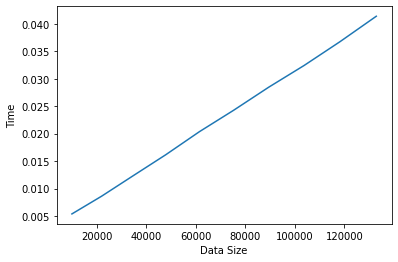

0.0022860360515451345 [2.92192479e-07]


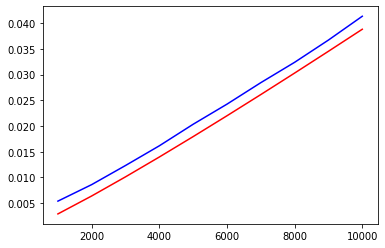

In [ ]:

N_big2 = 10000
num_it2 = 20
step2 = 1000
Data = np.random.rand(num_it2, N_big2)

dataSize2, execTime2 = Generate_Data(num_it2, N_big2, step2, MergeSort)

plt.plot(np.log2(dataSize2)*dataSize2, execTime2)
plt.ylabel("Time")
plt.xlabel("Data Size")
plt.show()

regressor2 = LinearRegression()
result2 = regressor2.fit((np.log2(dataSize2)*dataSize2).reshape(-1,1), execTime2)
print(result2.intercept_, result2.coef_)
plt.plot(dataSize2, np.log2(dataSize2)*dataSize2*result2.coef_, '-r')
plt.plot(dataSize2, execTime2, '-b')
plt.show()

## Problem 4

In [ ]:
def permut(Tab, debut, fin): # En O(1)
    temp = Tab[debut]
    Tab[debut] = Tab[fin]
    Tab[fin] = temp

def pivot(Tab, debut, fin): # En O(n) 
    p = debut
    while debut<fin:
        while Tab[p]<=Tab[fin] and debut<fin:
            fin-=1
        if debut>=fin: break
        permut(Tab, debut, fin) 
        p = fin
        debut+=1
        while Tab[p]>=Tab[debut] and debut<fin:
            debut+=1
        if debut>=fin: break
        permut(Tab, debut, fin) 
        p = debut
        fin-=1
    return p

def QuickSort(nums,debut,fin):
    #print(nums)
    p = pivot(nums, debut, fin)
    if debut < p-1: QuickSort(nums,debut,p-1)
    if fin > p+1: QuickSort(nums,p+1,fin)     
    


In [ ]:
T = [15,20,18,16,5,6,7,8]
R = [40,13,2,7,5,1]
debut = 0
fin = len(R)-1
QuickSort(R,debut,fin) 


In [ ]:
import random

def QuickSort2(nums):
    if len(nums) <= 1: return nums

    pivot = random.choice(nums)
    left = [v for v in nums if v < pivot]
    equal = [v for v in nums if v == pivot]
    right = [v for v in nums if v > pivot]

    return QuickSort2(left) + equal + QuickSort2(right)

## Problem 4 - complexity of algorithm
apply funtion `Generate_Data` here and showt that complexity of quick sort is indeed $O(n\log n)$.

In [ ]:
def Generate_Data3(num_it, N_big, step, func):
    points_to_plot = np.arange(step, N_big+1, step) # creating array points_to_plot of points to plot the graph
    el_time = np.zeros(len(points_to_plot))
    for i in range(len(points_to_plot)): # We go through the dimensions of arrays
        for j in range(num_it):
            temp = Data3[j,:points_to_plot[i]]   # do this, because sort is working locally and change our Data
            t0 = time.time()
            func(temp,0,len(temp)-1) # We sort the j-th array with dimension points_to_plot[i].
            t1 = time.time()
            el_time[i] += (t1 - t0)
        el_time[i]/= num_it
    return(points_to_plot, el_time)

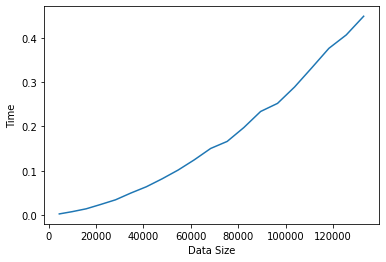

-0.06220217121148902 [3.47484172e-06]
score =  0.9639175704616877


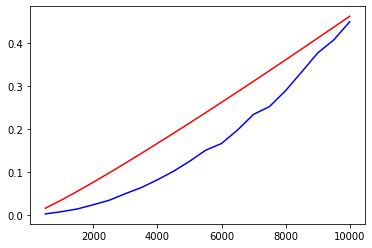

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import time

N_big3 = 10000
num_it3 = 50
step3 = 500
Data3 = np.random.rand(num_it3, N_big3)

dataSize3, execTime3 = Generate_Data3(num_it3, N_big3, step3, QuickSort)

plt.plot(np.log2(dataSize3)*dataSize3, execTime3)
plt.ylabel("Time")
plt.xlabel("Data Size")
plt.show()

regressor3 = LinearRegression()
result3 = regressor3.fit((np.log2(dataSize3)*dataSize3).reshape(-1,1), execTime3)
print(result3.intercept_, result3.coef_)
sc = result3.score((np.log2(dataSize3)*dataSize3).reshape((-1, 1)), execTime3)
print("score = ", sc)
plt.plot(dataSize3, np.log2(dataSize3)*dataSize3*result3.coef_, '-r')
plt.plot(dataSize3, execTime3, '-b')
plt.show()

## Problem 5

In [ ]:
def SearchInArray(nums,key):
    first, last = 0, len(nums)-1
    middle = (last+first)//2
    
    while first <= last:
        if key == nums[middle]: 
            return middle
        else:
            if nums[middle] >= nums[first]:
                if key < nums[first] or key > nums[middle]:
                    first = middle+1
                elif key >= nums[first] and key < nums[middle]:
                    last = middle-1
            else: #if nums[middle] < nums[first]:
                if key >= nums[first] or key < nums[middle]:
                    last = middle-1
                elif key < nums[first] and key > nums[middle]:
                    first = middle+1
            middle = (last+first)//2
        
    return -1  
